In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Creating DF**

In [42]:
marvel_data = [
    ['Spider-Man', 'male', 1962],
    ['Captain America', 'male', 1941],
    ['Wolverine', 'male', 1974],
    ['Iron Man', 'male', 1963],
    ['Thor', 'male', 1963],
    ['Thing', 'male', 1961],
    ['Mister Fantastic', 'male', 1961],
    ['Hulk', 'male', 1962],
    ['Beast', 'male', 1963],
    ['Invisible Woman', 'female', 1961],
    ['Storm', 'female', 1975],
    ['Namor', 'male', 1939],
    ['Hawkeye', 'male', 1964],
    ['Daredevil', 'male', 1964],
    ['Doctor Strange', 'male', 1963],
    ['Hank Pym', 'male', 1962],
    ['Scarlet Witch', 'female', 1964],
    ['Wasp', 'female', 1963],
    ['Black Widow', 'female', 1964],
    ['Vision', 'male', 1968]
]

marvelDF = pd.DataFrame(data=marvel_data,columns=['name', 'sex', 'first_appearance'])

 **Giving Index**

In [43]:
marvelDF.set_index('name',inplace=True)

In [44]:
### Drop 'Namor' and 'Hank Pym' rows

marvelDF.drop(['Namor','Hank Pym'] ,inplace=True)

## DataFrame selection, slicing and indexation

### Show the first 5 elements on `marvel_df`


In [45]:
marvelDF.head()

,sex,first_appearance
name,,
Spider-Man,male,1962
Captain America,male,1941
Wolverine,male,1974
Iron Man,male,1963
Thor,male,1963


### Show just the sex of the first 5 elements on `marvel_df`

In [46]:
# marvelDF.iloc[:5,0]
# marvelDF.iloc[:5]['sex']
marvelDF.head().sex.to_frame()

,sex
name,
Spider-Man,male
Captain America,male
Wolverine,male
Iron Man,male
Thor,male


### Show the first_appearance of all middle elements on `marvel_df` 

In [47]:
marvelDF.iloc[1:-1]['first_appearance']

name
Captain America     1941
Wolverine           1974
Iron Man            1963
Thor                1963
Thing               1961
Mister Fantastic    1961
Hulk                1962
Beast               1963
Invisible Woman     1961
Storm               1975
Hawkeye             1964
Daredevil           1964
Doctor Strange      1963
Scarlet Witch       1964
Wasp                1963
Black Widow         1964
Name: first_appearance, dtype: int64

### Show the first and last elements on `marvel_df`


In [48]:
marvelDF.iloc[[0,-1]]

,sex,first_appearance
name,,
Spider-Man,male,1962
Vision,male,1968


## DataFrame manipulation and operations

### Modify the `first_appearance` of 'Vision' to year 1964

In [49]:
marvelDF.loc['Vision','first_appearance'] = 1964

### Add a new column to `marvel_df` called 'years_since' with the years since `first_appearance`


In [50]:
marvelDF['first_appearance'] = pd.to_datetime(marvelDF['first_appearance'],format='%Y')

In [51]:
marvelDF.dtypes

sex                         object
first_appearance    datetime64[ns]
dtype: object

In [59]:
marvelDF['year_since'] = ((pd.to_datetime(2020,format='%Y') - marvelDF['first_appearance'] )/ np.timedelta64(1, 'Y')).astype(int)

In [ ]:
marvelDF

## DataFrame boolean arrays (also called masks)

### Given the `marvel_df` pandas DataFrame, make a mask showing the female characters


In [62]:
femaleFilter = (marvelDF['sex'] == 'female')


### Given the `marvel_df` pandas DataFrame, get the male characters


In [ ]:
marvelDF.loc[~femaleFilter] 

### Given the `marvel_df` pandas DataFrame, get the characters with `first_appearance` after 1970


In [68]:
after1970Filter = marvelDF['first_appearance'] > '1970'
marvelDF.loc[after1970Filter]

,sex,first_appearance,year_since
name,,,
Wolverine,male,1974-01-01,45
Storm,female,1975-01-01,45


### Given the `marvel_df` pandas DataFrame, get the female characters with `first_appearance` after 1970

In [71]:
after1970AndFemaleFilter = ((marvelDF['first_appearance'] > '1970') & (marvelDF['sex'] == 'female'))
marvelDF.loc[after1970AndFemaleFilter]

,sex,first_appearance,year_since
name,,,
Storm,female,1975-01-01,45


## DataFrame summary statistics

### Show basic statistics of `marvel_df`

In [73]:
marvelDF.describe()

,year_since
count,18.000000
mean,56.722222
std,6.578088
min,45.000000
25%,56.000000
50%,57.000000
75%,57.000000
max,78.000000


### Given the `marvel_df` pandas DataFrame, show the mean value of `first_appearance`

In [77]:
#np.mean(marvelDF.first_appearance)
marvelDF.first_appearance.dt.year.mean()

1962.888888888889

### Given the `marvel_df` pandas DataFrame, show the min value of `first_appearance`


In [78]:
marvelDF.first_appearance.dt.year.min()

1941

### Given the `marvel_df` pandas DataFrame, get the characters with the min value of `first_appearance`

In [83]:
minYear = pd.to_datetime(marvelDF['first_appearance'].dt.year.min(),format='%Y')
firstHeroFilter = (marvelDF['first_appearance'] == minYear)

marvelDF.loc[firstHeroFilter]

,sex,first_appearance,year_since
name,,,
Captain America,male,1941-01-01,78


## DataFrame basic plottings

### Reset index names of `marvel_df`


In [85]:
marvelDF.reset_index(inplace=True)

### Plot the values of `first_appearance`


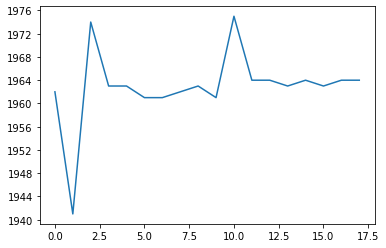

In [87]:
marvelDF.first_appearance.plot()

### Plot a histogram (plot.hist) with values of `first_appearance`


(array([ 1.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  2.]),
 array([708571. , 709812.8, 711054.6, 712296.4, 713538.2, 714780. ,
        716021.8, 717263.6, 718505.4, 719747.2, 720989. ]),
 <a list of 10 Patch objects>)

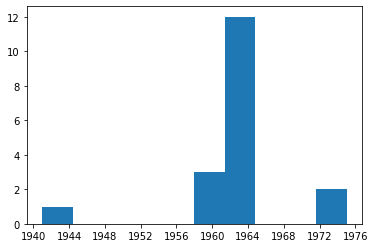

In [90]:
plt.hist(marvelDF.first_appearance)